# Lab 3. Recurrent Neural Networks

## Time-series data

## Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Generate time-series data

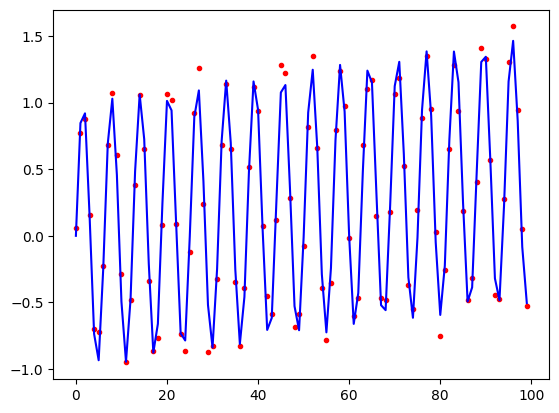

In [4]:
data_len = 1000

data_time_series = np.sin(np.arange(data_len)) + np.random.normal(0, 0.1, data_len) + np.arange(data_len)/200

plt.plot(data_time_series[0:100], 'r.')
plt.plot(range(100), np.sin(np.arange(100)) + np.arange(100)/200, 'b')
plt.show()

## Time-series data prediction

### MLP model: data preprocessing

In [5]:
data_matrix = []
seq_len = 3

for i in range(0, data_len-seq_len):
  tmp_data = data_time_series[i: i+seq_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[ 0.05613648  0.76955374  0.87699839  0.15394695]
 [ 0.76955374  0.87699839  0.15394695 -0.69654735]
 [ 0.87699839  0.15394695 -0.69654735 -0.72150713]
 ...
 [ 5.82113324  5.85624719  4.70819585  4.12644268]
 [ 5.85624719  4.70819585  4.12644268  4.01942235]
 [ 4.70819585  4.12644268  4.01942235  4.97776604]]


### train/test split

In [6]:
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]
print(x.shape)
print(y.shape)

n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

(997, 3)
(997,)


### keras sequential API

In [8]:
from keras import layers, models

input_shape = (seq_len, )

mlp_seq = models.Sequential()
mlp_seq.add(layers.Dense(units = 5, activation = 'tanh', input_shape=input_shape))
mlp_seq.add(layers.Dense(units = 10, activation = 'tanh'))
mlp_seq.add(layers.Dense(units = 1, activation = 'linear'))

mlp_seq.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
mlp_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = mlp_seq.fit(x_train, y_train,
                      validation_data = [x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 7ms/step - loss: 6.0289 - mean_squared_error: 6.0289 - val_loss: 17.8715 - val_mean_squared_error: 17.8715
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 3.6032 - mean_squared_error: 3.6032 - val_loss: 12.6804 - val_mean_squared_error: 12.6804
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 2.2213 - mean_squared_error: 2.2213 - val_loss: 9.0795 - val_mean_squared_error: 9.0795
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.6076 - mean_squared_error: 1.6076 - val_loss: 6.9915 - val_mean_squared_error: 6.9915
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3674 - mean_squared_error: 1.3674 - val_loss: 6.0312 - val_mean_squared_error: 6.0312
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 1.2292 - mean_squared_error: 1.2292 - val_loss: 5.4140 - val_mean_squared_error: 5.4140
Epoch 7/100
47/47 [===========

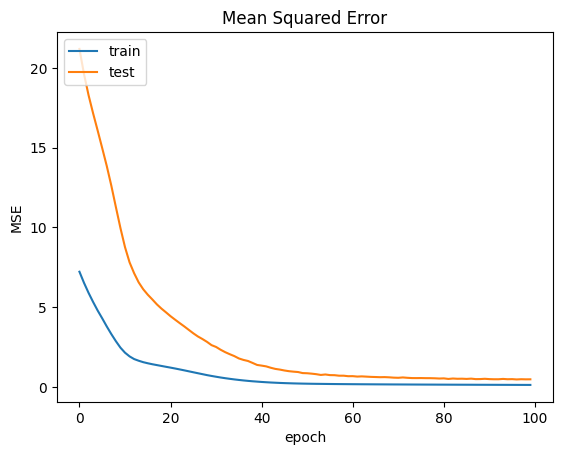

In [23]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 4ms/step


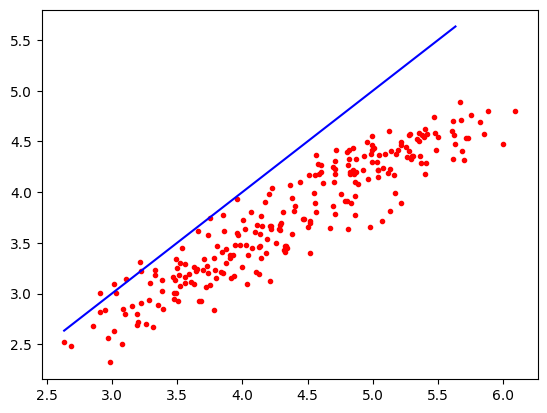

In [13]:
plt.plot(y_test, mlp_seq.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


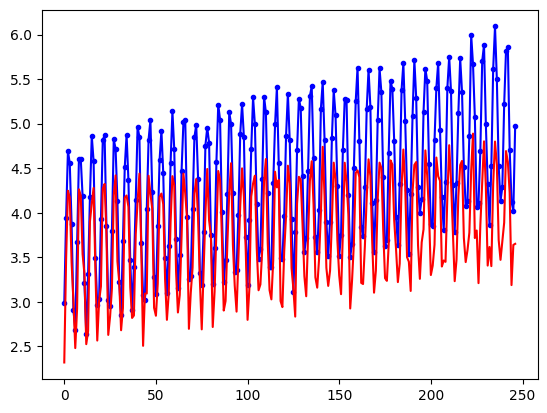

In [14]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), mlp_seq.predict(x_test), 'r-')
plt.show()

## LSTM: data preprocessing

In [15]:
rnn_sequence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]

print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
y = np.reshape(y, (-1, rnn_sequence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


### train/test split

In [16]:
n_train_data = 200

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


### keras functional API

In [18]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences=True)(input)
output= layers.TimeDistributed(layers.Dense(1, activation='linear'))(rnn_layer)

rnn_func = models.Model(input, output)

rnn_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = rnn_func.fit(x_train, y_train,
                        validation_data=[x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
13/13 [==============================] - 5s 47ms/step - loss: 7.2259 - mean_squared_error: 7.2259 - val_loss: 21.1899 - val_mean_squared_error: 21.1899
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 6.5294 - mean_squared_error: 6.5294 - val_loss: 19.6145 - val_mean_squared_error: 19.6145
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 5.9023 - mean_squared_error: 5.9023 - val_loss: 18.2918 - val_mean_squared_error: 18.2918
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 5.3301 - mean_squared_error: 5.3301 - val_loss: 17.1525 - val_mean_squared_error: 17.1525
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 4.7936 - mean_squared_error: 4.7936 - val_loss: 16.0732 - val_mean_squared_error: 16.0732
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 4.3040 - mean_squared_error: 4.3040 - val_loss: 14.9708 - val_mean_squared_error: 14.9708
Epoch 7/100
13/13 [==

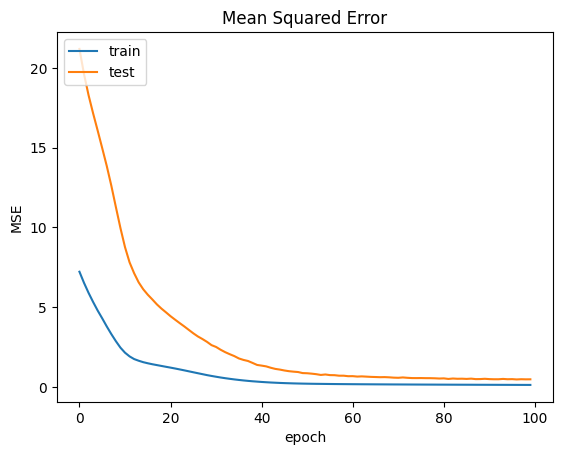

In [24]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 23ms/step


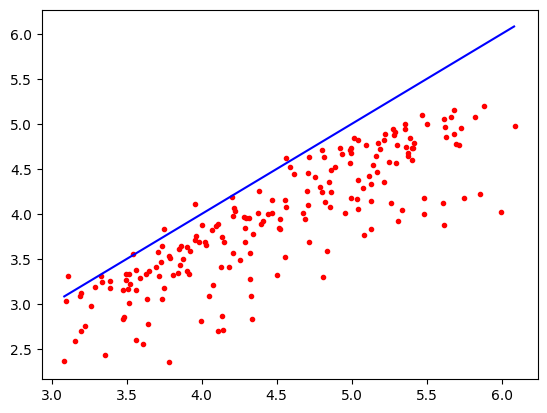

In [28]:
y_test_reshape = np.reshape(y_test, (-1, 1))
plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1,1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)),
         np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 4ms/step


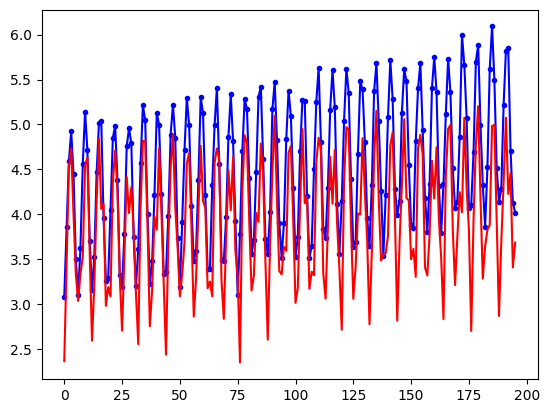

In [29]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r-')
plt.show()

## LSTM(many to one): data preprocessing

In [31]:
data_matrix = []

for i in range(0, data_len-data_dim*rnn_sequence_len):
  tmp_data = data_time_series[i:i+data_dim*rnn_sequence_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(988, 13)
[[ 0.05613648  0.76955374  0.87699839 ... -0.28493214 -0.95080492
  -0.4855054 ]
 [ 0.76955374  0.87699839  0.15394695 ... -0.95080492 -0.4855054
   0.38430551]
 [ 0.87699839  0.15394695 -0.69654735 ... -0.4855054   0.38430551
   1.05359694]
 ...
 [ 3.85965609  4.52243203  5.61677704 ...  5.85624719  4.70819585
   4.12644268]
 [ 4.52243203  5.61677704  6.09092077 ...  4.70819585  4.12644268
   4.01942235]
 [ 5.61677704  6.09092077  5.50006339 ...  4.12644268  4.01942235
   4.97776604]]


In [32]:
x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim*rnn_sequence_len]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim*rnn_sequence_len]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
print(x.shape)

(987, 12)
(987,)
(987, 4, 3)


### train/test split

In [39]:
n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4, 3)
(237, 4, 3)
(750,)
(237,)


### keras functional API

In [40]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences=False)(input)
output= layers.Dense(1, activation='linear')(rnn_layer)

rnn_mto1_func = models.Model(input, output)

rnn_mto1_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_mto1_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 10)                560       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = rnn_mto1_func.fit(x_train, y_train,
                            validation_data=[x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
47/47 [==============================] - 4s 16ms/step - loss: 3.7210 - mean_squared_error: 3.7210 - val_loss: 9.3288 - val_mean_squared_error: 9.3288
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 1.3358 - mean_squared_error: 1.3358 - val_loss: 4.6954 - val_mean_squared_error: 4.6954
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.7869 - mean_squared_error: 0.7869 - val_loss: 3.4588 - val_mean_squared_error: 3.4588
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 0.6515 - mean_squared_error: 0.6515 - val_loss: 2.8178 - val_mean_squared_error: 2.8178
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 0.5508 - mean_squared_error: 0.5508 - val_loss: 2.3723 - val_mean_squared_error: 2.3723
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4663 - mean_squared_error: 0.4663 - val_loss: 1.9933 - val_mean_squared_error: 1.9933
Epoch 7/100
47/47 [==============

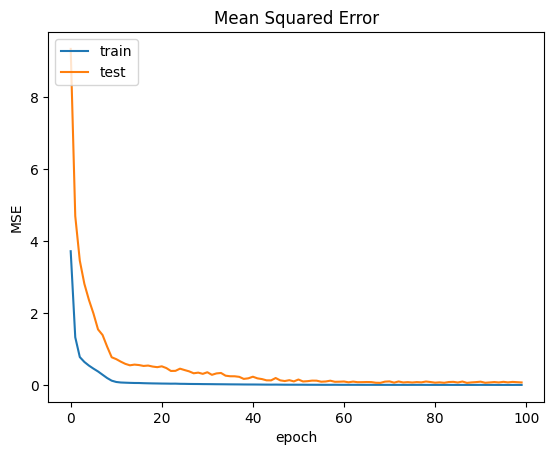

In [42]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


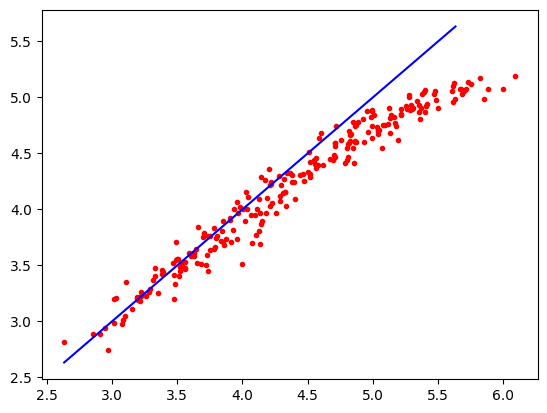

In [44]:
plt.plot(y_test, rnn_mto1_func.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), 
         np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


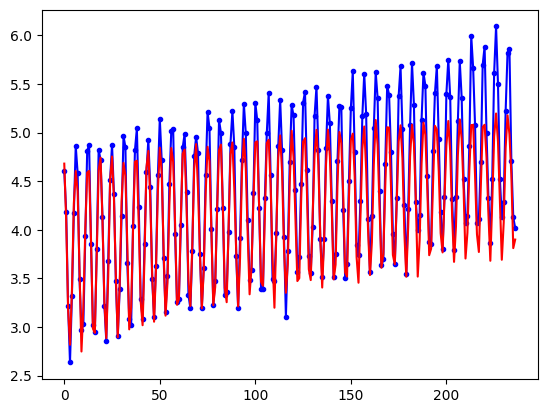

In [45]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), rnn_mto1_func.predict(x_test), 'r-')
plt.show()

https://keras.io/api/layers/recurrent_layers/